<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_matplotlib_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok Matplotlib használata 1.

<https://klajosw.blogspot.com/>


---

In [ ]:
## csomagok importálása
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## A mágikus parancs  bekapcsolja az inline plots rajzolás lehetőséget. A grafika alaphelyzetbe állítása és betöltése.
## Az inline direktiva a grafikai megjelenitést engedélyezi külső program nélkül is
%matplotlib inline

a = """
  %matplotlib          ## megjelenítéshez használni fog egy csomagot  (pl. Qt5Agg)
  %matplotlib notebook ## interaktív rajzokhoz, amelyek be vannak ágyazva a notebookba
  %matplotlib inline   ## statikus képeket eredményez, amely be van ágyazva a notebookba

----------------

The pyplot interface provides 4 commands that are useful for interactive control.

  isinteractive() ## returns the interactive setting True|False
  ion()           ## turns interactive mode on
  ioff()          ## turns interactive mode off
  draw()          ## forces a figure redraw

"""

In [ ]:
## Elérhető stilusok listázása
sorted(mpl.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'mycustomstyle',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

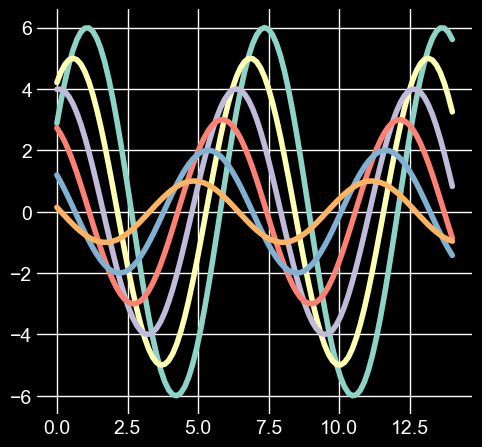

In [ ]:
def doplot():
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i))
    return ax

mpl.style.use('dark_background')
doplot()

Text(0.5, 1.0, 'default style')

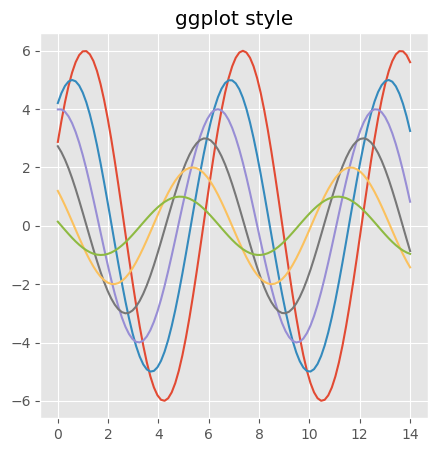

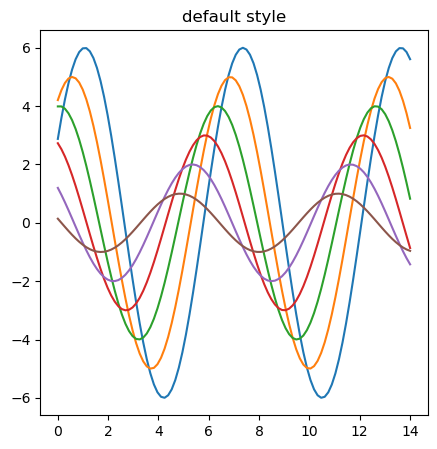

In [ ]:
# Set the default style.
mpl.style.use('default')
# Temporarily switch to the ggplot style.
with mpl.style.context('ggplot'):
    ax = doplot()
    ax.set_title('ggplot style')
# Back to the default style.
ax = doplot()
ax.set_title('default style')

In [ ]:
## könyvtár teljes elérési utvönala
cfgdir = mpl.get_configdir()
cfgdir

'C:\\Users\\User\\.matplotlib'

In [ ]:
## stilus beállítás
from pathlib import Path
p = Path(cfgdir)
stylelib = (p / 'stylelib')
stylelib.mkdir(exist_ok=True)
path = stylelib / 'mycustomstyle.mplstyle'

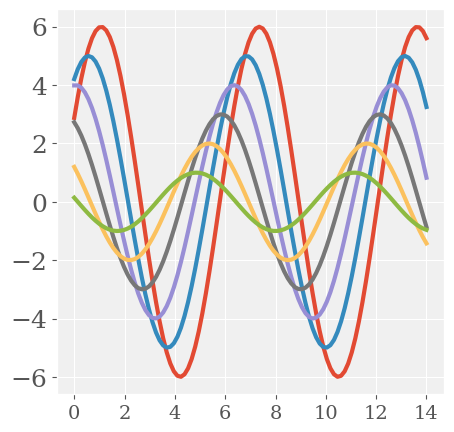

In [ ]:
path.write_text('''
axes.facecolor : f0f0f0  ## szín
font.family : serif      ## betűtipus
lines.linewidth : 3      ## vonal vastagság
xtick.labelsize : 14     ## betű méret
ytick.labelsize : 18     ## betű méret
''')
mpl.style.reload_library()
with mpl.style.context(['ggplot', 'mycustomstyle']):
    doplot()

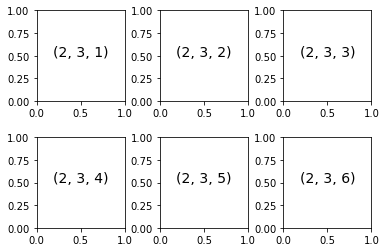

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## -- to convert a pandas.DataFrame
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values

## -- to convert a np.matrix
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)


## több diagram terület generálása
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=14, ha='center')

plt.draw()


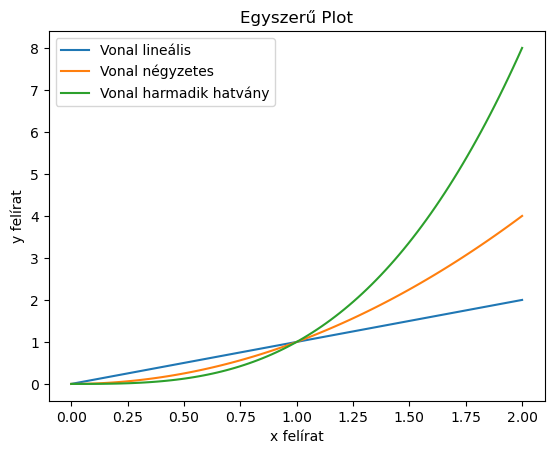

In [ ]:
## Vonaldiagram minta

x = np.linspace(0, 2, 100)
plt.plot(x, x, label='Vonal lineális')
plt.plot(x, x**2, label='Vonal négyzetes')
plt.plot(x, x**3, label='Vonal harmadik hatvány')
plt.xlabel('x felírat')
plt.ylabel('y felírat')
plt.title("Egyszerű Plot")
plt.legend()
plt.show()

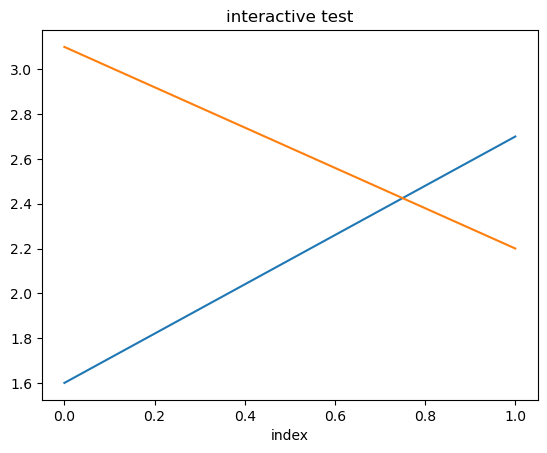

In [ ]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1.6, 2.7])

plt.title("interactive test")   ## felső felírat
plt.xlabel("index")             ## alsó felírat

ax = plt.gca()
ax.plot([3.1, 2.2])

plt.draw()



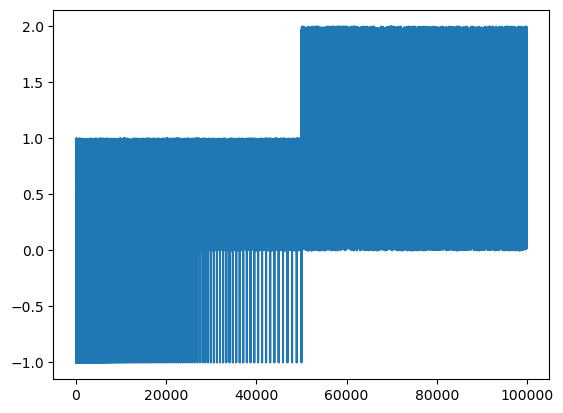

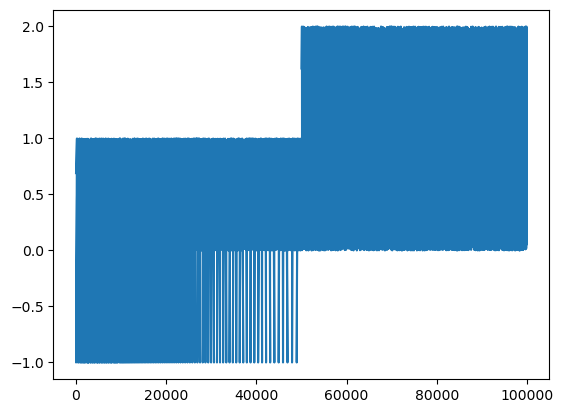

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1

mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()



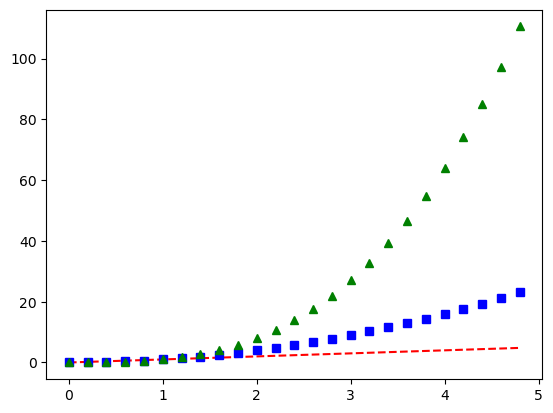

In [ ]:
import numpy as np

t = np.arange(0., 5., 0.2)

plt.plot(t, 
         t, 'r--',        ## lineális         / piros vonal
         t, t**2, 'bs',   ## négyzetes        / kék négyzet
         t, t**3, 'g^')   ## harmadik hatvány / zöld háromszög
plt.show()



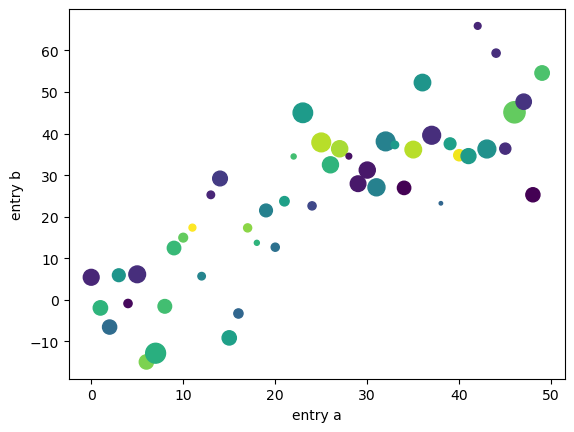

In [ ]:
## kör terület diagram 1
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)

plt.xlabel('entry a')   ## cimkék
plt.ylabel('entry b')   ## cimkék

plt.show()


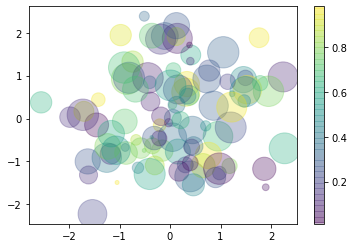

In [ ]:
## kör terület diagram 2
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')

plt.colorbar();  # show color scale


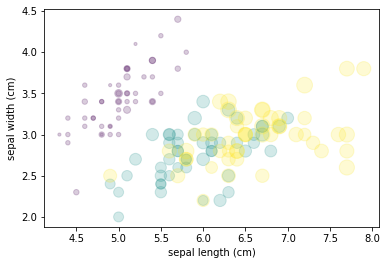

In [ ]:
## irisz virág kör terület diagram 3
from sklearn.datasets import load_iris
iris = load_iris()             ## iris adatok letöltése

features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

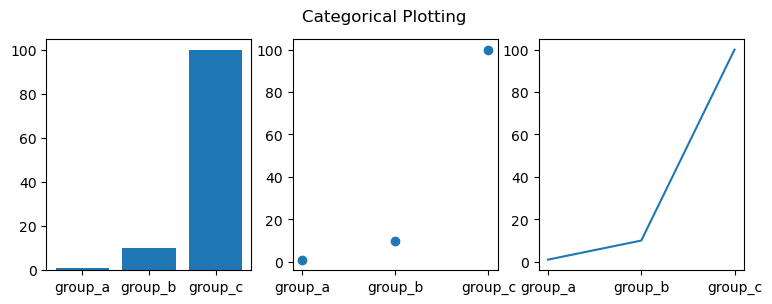

In [ ]:
## csoportositás
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


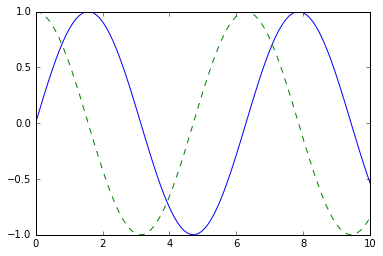

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()

plt.plot(x, np.sin(x), '-')   ## vonal
plt.plot(x, np.cos(x), '--')  ## szagatott vonal

fig.savefig('my_figure.png')  ## kép metése png formátumba
plt.savefig("test.svg")       ## kép metése svg formátumba

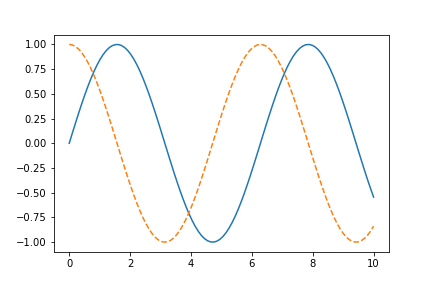

In [ ]:
## lementett kép megjelenitése a notebook-ban
from IPython.display import Image
Image('my_figure.png')

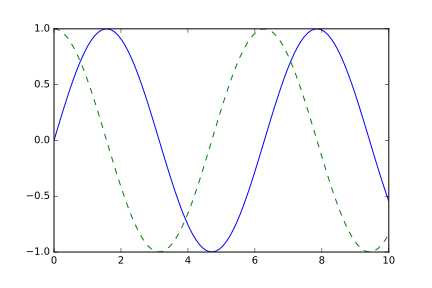

In [ ]:
import matplotlib
matplotlib.use('svg')

from IPython.display import Image, SVG
## lementett svg kép megjelenitése a notebook-ban
SVG(filename="test.svg")

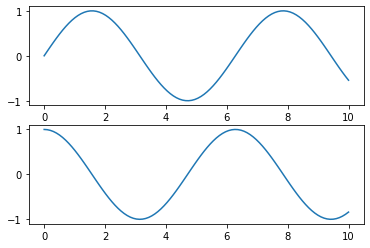

In [ ]:
plt.figure()  ## rajzolás beállításai

## első panelre rajzolás
plt.subplot(2, 1, 1)    ## (sor, oszlop, panel száma)
plt.plot(x, np.sin(x))  ## sinus függvény

## második panelre rajzolás
plt.subplot(2, 1, 2)    ## (sor, oszlop, panel száma)
plt.plot(x, np.cos(x))  ## cosinus függvény

plt.show()

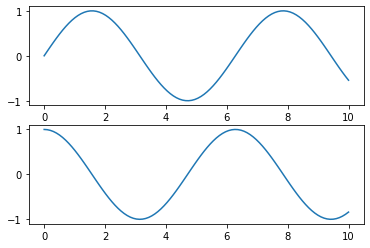

In [ ]:
# Ugyan ezt máshogyan
# két rajzolási terület megadása
fig, ax = plt.subplots(2)

# Objekum orientált meghívás mód
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

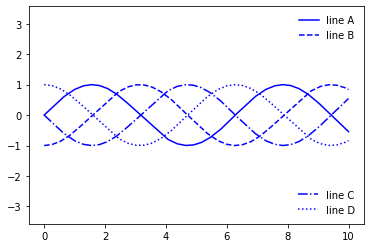

In [ ]:
## több szintű felíratozás
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='blue')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

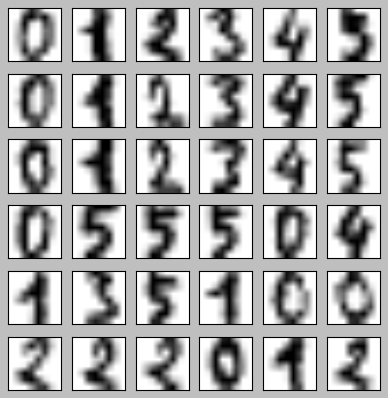

In [ ]:
## szám felísmerési minta

## csomag betöltése
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)  ## kép betöltés  0 -tól 5 -ig és vizualizálás

fig, ax = plt.subplots(6, 6, figsize=(6, 6))  ## 4x4 mátrixba jeleniteni meg 6x6 méretűeket

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

    

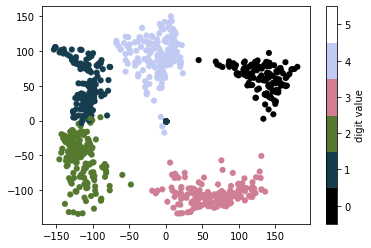

In [ ]:
# számjegye kivétele 2 dimenzio  használjuk a IsoMap
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# plot -on az eredmény megjelenítése
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))

plt.colorbar(ticks=range(6), label='digit value')

plt.clim(-0.5, 5.5)

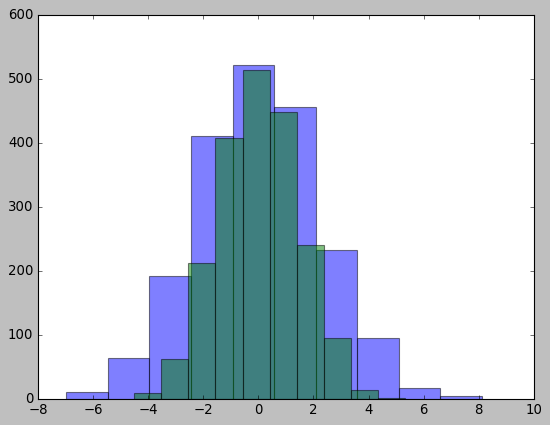

In [ ]:
## oszlop diagram
plt.style.use('classic')

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col],  alpha=0.5)


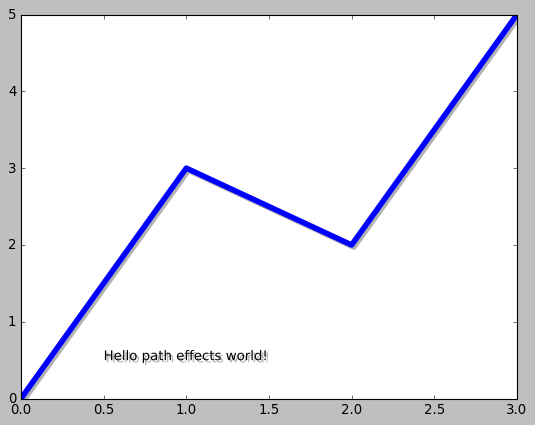

In [ ]:
import matplotlib.patheffects as path_effects
text = plt.text(0.5, 0.5, 'Hello path effects world!',
path_effects=[path_effects.withSimplePatchShadow()])
plt.plot([0, 3, 2, 5], linewidth=5, color='blue',


path_effects=[path_effects.SimpleLineShadow(),
path_effects.Normal()])
plt.show()


In [ ]:
%reset -f  
### Let's remove all the objects from the namespace.

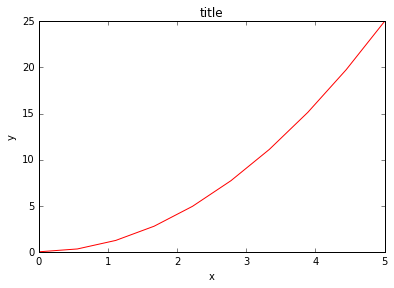

In [ ]:
import numpy as np
x = np.linspace(0, 5, 10)
y = x ** 2
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

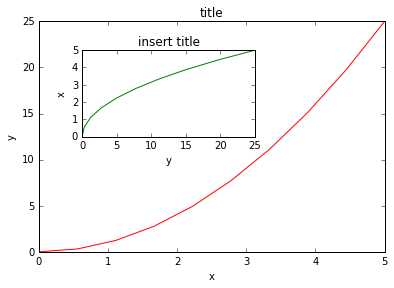

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

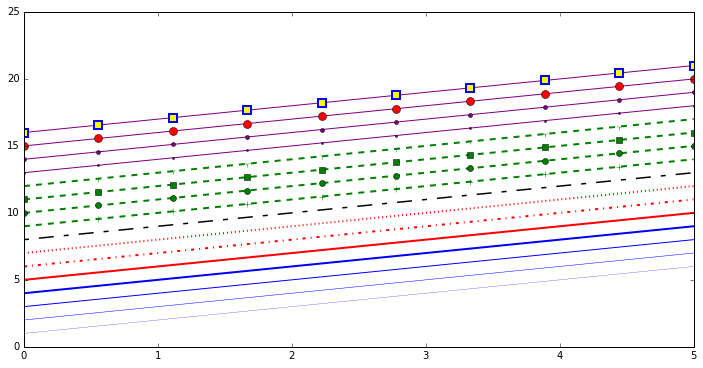

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

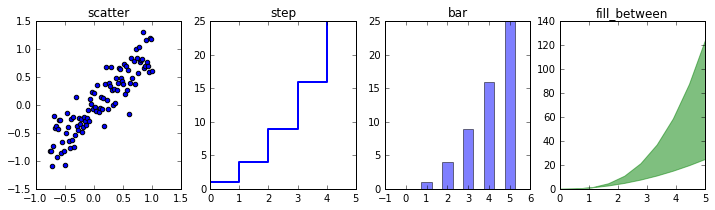

In [ ]:
## egyéb hasznos stilusok a megjelenítéshez
fig, axes = plt.subplots(1, 4, figsize=(12,3))

xx = np.linspace(-0.75, 1., 100)
n = np.array([0,1,2,3,4,5])

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

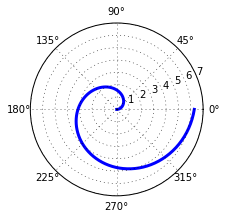

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

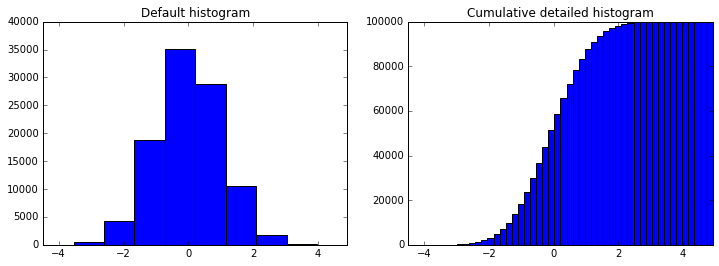

In [ ]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

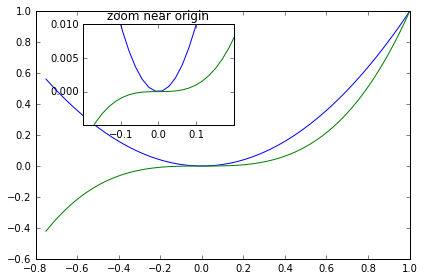

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

In [ ]:
%reset -f  
### Let's remove all the objects from the namespace.
##  UserWarning: Matplotlib is currently using svg, which is a non-GUI backend, so cannot show the figure.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using svg, which is a non-GUI backend, so cannot show the figure.


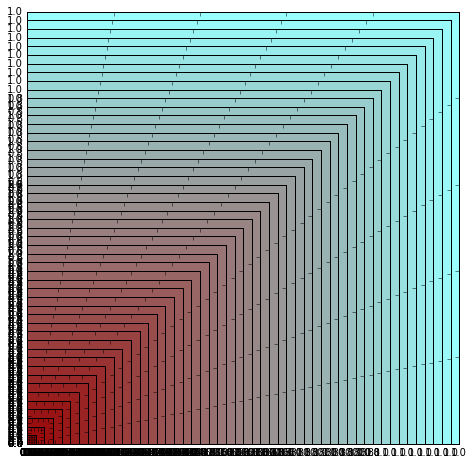

In [ ]:
import numpy as np
x = np.linspace(0, 5, 10)
y = x ** 2
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = []
sizes = np.linspace(0.02, 1, 50)
for i in range(50):
    color = str(hex(int(sizes[i] * 255)))[2:]
    if len(color) == 1: color = '0' + color
    color = '#99' + 2 * color
    ax.append(plt.Axes(fig=fig, rect=[0,0, sizes[i], sizes[i]], facecolor=color))

ax.reverse()
for axes in ax:
    fig.add_axes(axes)
plt.show()

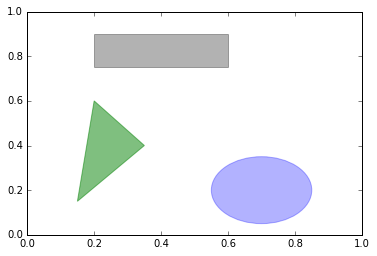

In [ ]:
## rajzolás
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1);
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);